# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [3]:
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

In [4]:
filter_sidebar = soup.find("div", class_="filter-menu-bar sidebar-filter")

In [5]:
treats_container = filter_sidebar.nextSibling.nextSibling

In [6]:
# scrape the names of the items on the webpage above
items = treats_container.findAll('a')
items[0:6]

[<a class="name-link" data-lid="Greenies Regular Dental Dog Treats" data-link-type="o" data-lpos="product-list" data-master="product-click" href="/dog/treats/dental-treats/greenies-regular-dental-dog-treats-4750.html?cgid=100269" title="Greenies Regular Dental Dog Treats">
 <div class="product-tile" data-itemid="4750" id="1806d42c4c06fbff2c47b5b2e9">
 <div class="product-tile-badge">
 </div>
 <div class="product-image-wrapper">
 <div class="product-image">
 <img alt="" data-desktop="https://s7d2.scene7.com/is/image/PetSmart/5265958?$sclp-prd-main_large$" data-mobile="https://s7d2.scene7.com/is/image/PetSmart/5265958?$sclp-prd-main_small$" itemprop="image" src="https://s7d2.scene7.com/is/image/PetSmart/5265958?$sclp-prd-main_large$">
 </img></div>
 <meta content="https://s7d2.scene7.com/is/image/PetSmart/5265958?$sclp-prd-main_large$" property="og:image">
 <meta content="https://s7d2.scene7.com/is/image/PetSmart/5265958?$sclp-prd-main_large$" name="twitter:image">
 <div class="product-t

In [7]:
items[0].attrs['title']

'Greenies Regular Dental Dog Treats'

In [8]:
item_titles = [i.attrs['title'] for i in items]
print(len(item_titles), item_titles[:5])

38 ['Greenies Regular Dental Dog Treats', 'Greenies Teenie Dental Dog Treats', 'Greenies Large Dental Dog Treats', 'Authority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free', 'Greenies Petite Dental Dog Treats']


In [9]:
item_names = []
for i in item_titles:
    item_names.append(i)

In [16]:
del item_names[-1]
del item_names[-2]

In [17]:
item_names

['Greenies Regular Dental Dog Treats',
 'Greenies Teenie Dental Dog Treats',
 'Greenies Large Dental Dog Treats',
 'Authority® Dental & DHA Stick Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'Greenies Petite Dental Dog Treats',
 'WHIMZEES Brushzees Dental Dog Treat - Natural, Grain Free, 1 Count',
 'Pedigree Dentastix Triple Action Dental Dog Treats - Variety Pack',
 'Pedigree Dentastix Large Dog Treats',
 'Pedigree Dentastix Large Dog Sticks',
 'Authority® Dental & DHA Rings Puppy Treats Parsley Mint - Gluten Free, Grain Free',
 'WHIMZEES Veggie Sausage Dog Dental Treat - Natural, 1 Count',
 'Pedigree Dentastix Small/Medium Dog Sticks',
 'Greenies Teenie Dog Dental Treats - Blueberry',
 'WHIMZEES Variety Value Box Dental Dog Treat - Natural, Grain Free',
 'Virbac® C.E.T.® VeggieDent® Tartar Control Dog Chews',
 'Pedigree Dentastix Triple Action Small Dog Treats - Fresh',
 'Authority Dental & Multivitamin Large Dog Treats Parsley Mint - Gluten Free, Grain Free',
 'Yummy Combs

In [18]:
# load the data into a dataframe file
import pandas as pd
df = pd.DataFrame([item_names]).transpose()
df.columns = ['Dental Treats']

In [19]:
# save the data as a csv file
df.to_csv('data/part1.csv', index=False)

In [20]:
# display df.head()
df.head()

,Dental Treats
0,Greenies Regular Dental Dog Treats
1,Greenies Teenie Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Authority® Dental & DHA Stick Puppy Treats Par...
4,Greenies Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [21]:
# load in the dataframe, notice it only contains columns salaries, NPS Score, eventOutcome
df_2 = pd.read_csv('data/part2.csv')
df_2.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [22]:
salary_mean = df_2['salaries'].mean()
salary_std = df_2['salaries'].std()

nps_mean =  df_2['NPS Score'].mean()
nps_std =  df_2['NPS Score'].std()

event_mean = df_2['eventOutcome'].mean()
event_std = df_2['eventOutcome'].std()

print(salary_mean, salary_std)
print(nps_mean, nps_std)
print(event_mean, event_std)

49953.2898 4000.459734609712
20.327 29.913907123073603
3.5356 2.2984754159763314


In [53]:
def zscores(arr):
    """
    write a function that calculates 
    the zscores of a numpy arr, arr.
    """
    for index in df_2:
        z = (len(df_2[index]) - np.mean(df_2[index])) / np.std(df_2[index])
        print(z)
        
        
zscores(df_2)

-11.238154808669226
166.48346942837742
2174.034182252448


In [9]:
# calculate the zscore for each column and store them as a new column with the names used above
df_2['salaries_zscores'] = zscores(df_2['salaries_zscores'])
df_2['NPS score_zscores'] = zscores(df_2['NPS score_zscores'])
df_2['eventOutcome_zscores'] = zscores(df_2['eventOutcome_zscores'])

# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'NPS Scores')

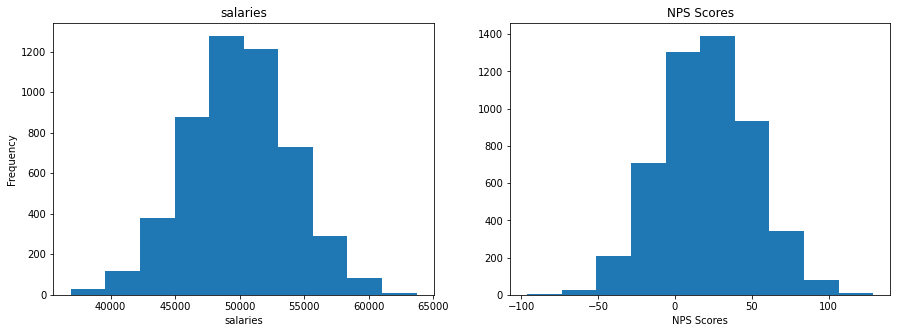

In [24]:
# plot for raw salaries and NPS Score data goes here
fig = plt.figure(figsize=(15,5))


ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(df_2['salaries'])
ax2.hist(df_2['NPS Score'])

ax1.set_title ("salaries");
ax2.set_title ("NPS Scores");

ax1.set_ylabel('Frequency')
ax1.set_xlabel('salaries')
ax2.set_xlabel('NPS Scores')

In [89]:
# plot for zscores for salaries and NPS Score data goes here

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [25]:
import collections
counter = collections.Counter(df_2['eventOutcome'])
print(counter)
print(len(df_2['eventOutcome']))

Counter({4: 666, 7: 661, 3: 636, 0: 624, 6: 622, 1: 608, 2: 592, 5: 591})
5000


dict_keys([1, 2, 5, 0, 6, 4, 3, 7]) [0.122, 0.118, 0.118, 0.125, 0.124, 0.133, 0.127, 0.132]


Text(0, 0.5, 'Probability')

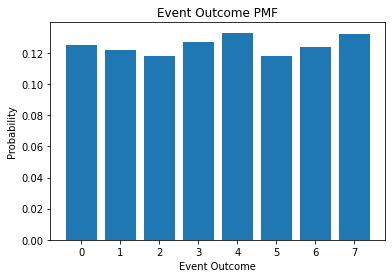

In [91]:
pmf = []

for key,val in counter.items():
    pmf.append(round(val/5000, 3))
    
print(counter.keys(), pmf)

plt.bar(counter.keys(), pmf);
plt.title("Event Outcome PMF");
plt.xlabel('Event Outcome')
plt.ylabel('Probability')

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

/Users/Gabby/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


Text(0, 0.5, 'P(E<=N)')

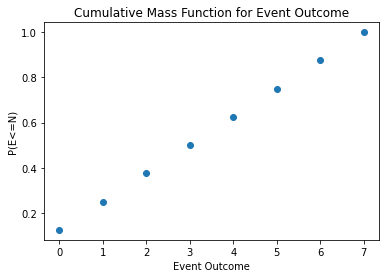

In [26]:
sample = list(counter.keys())
hist = np.histogram(sample, bins = 8, range=(0,8), normed=True)
plt.scatter(hist[1][:-1], np.cumsum(hist[0]))
plt.title('Cumulative Mass Function for Event Outcome')
plt.xlabel('Event Outcome')
plt.ylabel('P(E<=N)')

# Level Up:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

* plot the pdf and cdf of a given distribution

In [10]:
# find salaries with zscores <= 2.0 

In [11]:
# calculate skewness and kurtosis of NPS Score column

# Plotting a pdf and cdf of a normal distribution
A survey is taken that finds that students send an mean average of 80 DMs a day with a standard deviation of 6 DMS. 

In [13]:
# plot the pdf and cdf of this normal distribution. level up if you can do it in subplots

In [14]:
# what is the probability of drawing a student that sends at least 82 DMs a day?

A second survey is taken at another bootcamp that shows that students send a mean average of
80 DMs a day, but they have a standard deviation of 9 DMS.  

In [15]:
# What is the difference in the probability of finding a student that sends, at most, 65 DMs a day? 

# run the cell below to convert your notebook to a README for assessment

In [27]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md

[NbConvertApp] Converting notebook assessment.ipynb to markdown
[NbConvertApp] Support files will be in assessment_files/
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Making directory assessment_files
[NbConvertApp] Writing 26362 bytes to assessment.md
